# 1. Tensor	properties - ranks, shapes and types

In [4]:
## tensor rank
import tensorflow as tf
tens1 = tf.constant([[[1,2],[2,3]],[[3,4],[5,6]]])
print tens1
sess = tf.Session()
print sess.run(tens1)[1,1,0]

Tensor("Const_3:0", shape=(2, 2, 2), dtype=int32)
5


# 2. Creating new tensor

In [4]:
import tensorflow as tf
import numpy as np
x = tf.constant(np.random.rand(10).astype(np.float32))
y = tf.constant([1,2,3])
z_data = np.array([[1,2,3],[2,3,4]])
z = tf.convert_to_tensor(z_data, dtype=tf.float32)

sess = tf.Session()
print sess.run(x)
print sess.run(y)
print sess.run(z)

[ 0.86361557  0.7258231   0.08961751  0.75023025  0.57804155  0.03352209
  0.93330175  0.43788651  0.48649251  0.74827981]
[1 2 3]
[[ 1.  2.  3.]
 [ 2.  3.  4.]]


# 3. Simple matrix operation

In [14]:
import tensorflow as tf

sess = tf.InteractiveSession()
x = tf.constant([[2, 5, 3, -5],
                [0, 3, -2, 5],
                [4, 3, 5, 3],
                [6, 1, 4, 0]])
y = tf.constant([[4, -7, 4, -3, 4],
                [6, 4, -7, 4, 7],
                [2, 3, 2, 1, 4],
                [1, 5, 5, 5, 2]])
floatx = tf.constant([[2., 5., 3., -5.],
                    [0., 3., -2., 5.],
                    [4., 3., 5., 3.],
                    [6., 1., 4., 0.]])
print "x transpose: \n", tf.transpose(x).eval()
print "matmul(x,y): \n", tf.matmul(x, y).eval()
print "floatx determinant:", tf.matrix_determinant(floatx).eval()
print "floatx inverse: \n", tf.matrix_inverse(floatx).eval()
print "solve matrix: \n", tf.matrix_solve(floatx, [[1],[1],[1],[1]]).eval()

x transpose: 
[[ 2  0  4  6]
 [ 5  3  3  1]
 [ 3 -2  5  4]
 [-5  5  3  0]]
matmul(x,y): 
[[ 39 -10 -46  -8  45]
 [ 19  31   0  35  23]
 [ 47  14  20  20  63]
 [ 38 -26  25 -10  47]]
floatx determinant: 818.0
floatx inverse: 
[[-0.00855745  0.10513447 -0.18948655  0.29584354]
 [ 0.12958434  0.12224938  0.01222495 -0.05134475]
 [-0.01955992 -0.18826404  0.28117359 -0.18092909]
 [-0.08557458  0.05134474  0.10513448 -0.0415648 ]]
solve matrix: 
[[ 0.202934  ]
 [ 0.21271393]
 [-0.10757945]
 [ 0.02933985]]


# 4. Reduction
Reduction is an operation that applies an operation across one of the tensor's dimensions, leaving it with one less dimension.

In [23]:
import tensorflow as tf

sess = tf.InteractiveSession()
x = tf.constant([[1, 2, 3],
                [3, 2, 1],
                [-1, -2, -3]])
boolean_tensor = tf.constant([[True, False, True],
                              [False, False, True],
                              [True, False, False]])
print "reduce_prod: ", tf.reduce_prod(x, reduction_indices=1).eval()
print "reduce_min: ", tf.reduce_min(x, reduction_indices=1).eval()
print "reduce_max: ", tf.reduce_max(x, reduction_indices=1).eval()
print "reduce_mean: ", tf.reduce_mean(x, reduction_indices=1).eval()
print "reduce_all: ", tf.reduce_all(boolean_tensor, reduction_indices=1).eval()
print "reduce_any: ", tf.reduce_any(boolean_tensor, reduction_indices=1).eval()

reduce_prod:  [ 6  6 -6]
reduce_min:  [ 1  1 -3]
reduce_max:  [ 3  3 -1]
reduce_mean:  [ 2  2 -2]
reduce_all:  [False False False]
reduce_any:  [ True  True  True]


# 5.Tensor segmentation 

In [5]:
import tensorflow as tf

sess = tf.InteractiveSession()
seg_ids = tf.constant([0,1,1,2,2]); # Group indexes : 0|1,2|3,4
tens1 = tf.constant([[2, 5, 3, -5],
                    [0, 3,-2, 5],
                    [4, 3, 5, 3],
                    [6, 1, 4, 0],
                    [6, 1, 4, 0]])

print tf.segment_sum(tens1, seg_ids).eval()
print tf.segment_prod(tens1, seg_ids).eval()
print tf.segment_min(tens1, seg_ids).eval()
print tf.segment_mean(tens1, seg_ids).eval()

[[ 2  5  3 -5]
 [ 4  6  3  8]
 [12  2  8  0]]
[[  2   5   3  -5]
 [  0   9 -10  15]
 [ 36   1  16   0]]
[[ 2  5  3 -5]
 [ 0  3 -2  3]
 [ 6  1  4  0]]
[[ 2  5  3 -5]
 [ 2  3  1  4]
 [ 6  1  4  0]]


# 6. Sequence Comparison and Indexing

In [14]:
import tensorflow as tf

sess = tf.InteractiveSession()
x = tf.constant([[2, 5, 3, -5],
                [0, 3,-2, 5],
                [4, 3, 5, 3],
                [6, 1, 4, 0]])
listx = tf.constant([1,2,3,4,5,6,6,7,8])
listy = tf.constant([4,5,8,9])
boolx = tf.constant([[True,False], [False,True]])

print tf.argmin(x, 1).eval()
# print tf.listdiff(listx, listy)[0].eval()
print tf.where(boolx).eval()
print tf.unique(listx)[0].eval()

[3 2 1 3]
[[0 0]
 [1 1]]
[1 2 3 4 5 6 7 8]


# 7. Tensor shape transformations

In [25]:
import tensorflow as tf

sess = tf.InteractiveSession()
x = tf.constant([[2, 5, 3, -5],
                [0, 3,-2, 5],
                [4, 3, 5, 3],
                [6, 1, 4, 0]])
print tf.shape(x).eval()
print tf.size(x).eval()
print tf.rank(x).eval()
print tf.reshape(x, [2,8]).eval()
print tf.squeeze(x).eval()
print tf.expand_dims(x, 1).eval()

[4 4]
16
2
[[ 2  5  3 -5  0  3 -2  5]
 [ 4  3  5  3  6  1  4  0]]
[[ 2  5  3 -5]
 [ 0  3 -2  5]
 [ 4  3  5  3]
 [ 6  1  4  0]]
[[[ 2  5  3 -5]]

 [[ 0  3 -2  5]]

 [[ 4  3  5  3]]

 [[ 6  1  4  0]]]


# 8. Tensor slicing and joining

In [46]:
import tensorflow as tf

sess = tf.InteractiveSession()
t_matrix = tf.constant([[1,2,3],
                        [4,5,6],
                        [7,8,9]])
t_array = tf.constant([1,2,3,4,9,8,6,5])
t_array2= tf.constant([2,3,4,5,6,7,8,9])

print tf.slice(t_matrix, [1,1], [2,2]).eval()
print tf.split(0, 2, t_array)[0].eval()
print tf.tile([1,2], [3]).eval()
print tf.pad(t_matrix, [[1,2],[3,4]]).eval()
print tf.concat(0, [t_array, t_array2]).eval()
print tf.pack([t_array, t_array2]).eval()
print sess.run(tf.unpack(t_matrix)[0])
print tf.reverse(t_matrix, [False, True]).eval()

[[5 6]
 [8 9]]
[1 2 3 4]
[1 2 1 2 1 2]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 2 3 0 0 0 0]
 [0 0 0 4 5 6 0 0 0 0]
 [0 0 0 7 8 9 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[1 2 3 4 9 8 6 5 2 3 4 5 6 7 8 9]
[[1 2 3 4 9 8 6 5]
 [2 3 4 5 6 7 8 9]]
[1 2 3]
[[3 2 1]
 [6 5 4]
 [9 8 7]]


# 9. Read CSV format data
参考：http://wiki.jikexueyuan.com/project/tensorflow-zh/how_tos/reading_data.html
   读取过程图：http://wiki.jikexueyuan.com/project/tensorflow-zh/images/AnimatedFileQueues.gif

In [1]:
import tensorflow as tf
import numpy as np

def read_my_file_format(fileNameQueue):
    reader = tf.TextLineReader()
    key, value = reader.read(fileNameQueue)

    record_defaults = [[0.], [0.], [0.], [0.], [""]]
    col1, col2, col3, col4, col5 = tf.decode_csv(value, record_defaults = record_defaults)
    features = tf.pack([col1, col2, col3, col4])
    label = col5
    return features, label

def input_pipeline(fileNames, batchSize = 4, numEpochs = None):
    fileNameQueue = tf.train.string_input_producer(fileNames, num_epochs = numEpochs)
    features, label = read_my_file_format(fileNameQueue)
    min_after_dequeue = 8
    capacity = min_after_dequeue + 3 * batchSize
    featuresBatch, labelBatch = tf.train.shuffle_batch([features, label],
            batch_size = batchSize, num_threads = 5,  capacity = capacity, min_after_dequeue = min_after_dequeue)
    return featuresBatch, labelBatch

featureBatch, labelBatch = input_pipeline(["../data/iris.data"], batchSize = 2)
with tf.Session() as sess:
    # Start populating the filename queue.                                                                                                                                                                                                                                    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    # Retrieve a single instance:                                                                                                                                                                                                                                             
    try:
        #while not coord.should_stop():                                                                                                                                                                                                                                       
        for i in range(3):
            features, label = sess.run([featureBatch, labelBatch])
            print features, label
            coord.request_stop()
    except tf.errors.OutOfRangeError:
        print 'Done reading'
    finally:
        coord.request_stop()

    coord.join(threads)
    sess.close()

[[ 5.          3.5999999   1.39999998  0.2       ]
 [ 4.5999999   3.4000001   1.39999998  0.30000001]] ['Iris-setosa' 'Iris-setosa']
[[ 4.69999981  3.20000005  1.29999995  0.2       ]
 [ 5.0999999   3.5         1.39999998  0.2       ]] ['Iris-setosa' 'Iris-setosa']
[[ 5.69999981  4.4000001   1.5         0.40000001]
 [ 4.30000019  3.          1.10000002  0.1       ]] ['Iris-setosa' 'Iris-setosa']


# 10. Loading and processing the images

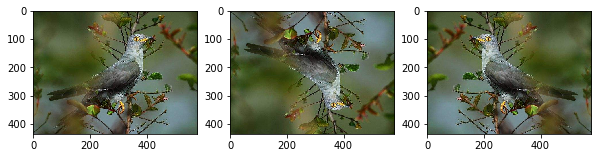

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt 

filename_queue = tf.train.string_input_producer(tf.train.match_filenames_once("../data/bugu.jpg"))
reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)
image = tf.image.decode_jpeg(value)

# flipImageUpDown = tf.image.encode_jpeg(tf.image.flip_up_down(image))
flipImageUpDown = tf.image.flip_up_down(image)
# flipImageLeftRight = tf.image.encode_jpeg(tf.image.flip_left_right(image))
flipImageLeftRight = tf.image.flip_left_right(image)

sess = tf.Session()
tf.global_variables_initializer().run(session=sess)
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=sess)

plt.figure(figsize=(10,30))
plt.subplot(131).imshow(image.eval(session=sess))
plt.subplot(132).imshow(flipImageUpDown.eval(session=sess))
plt.subplot(133).imshow(flipImageLeftRight.eval(session=sess))
plt.show()